In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


C:\Users\patil\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\patil\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
df = pd.read_csv('Twitter_Data.csv')
df.head()
df.columns

Index(['clean_text', 'category'], dtype='object')

In [9]:
df = df[['clean_text', 'category']].dropna()
df = df.rename(columns={'clean_text': 'text', 'category': 'label'})
mapping = {-1: 'negative', 0: 'neutral', 1: 'positive'}
df['label'] = df['label'].map(mapping)
df.head()

,text,label
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,neutral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive


In [10]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

len(X_train), len(X_test)


(130375, 32594)

In [11]:
# TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', min_df=3)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model
model = LinearSVC()
model.fit(X_train_vec, y_train)


LinearSVC()

In [12]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8582254402650794

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.77      0.81      7102
     neutral       0.83      0.92      0.87     11042
    positive       0.89      0.85      0.87     14450

    accuracy                           0.86     32594
   macro avg       0.86      0.85      0.85     32594
weighted avg       0.86      0.86      0.86     32594



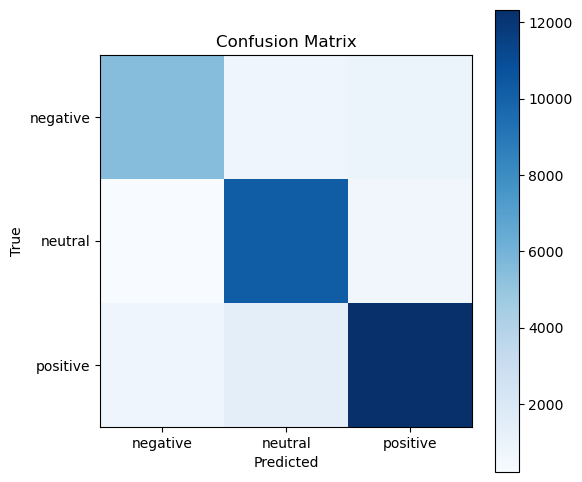

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues')
plt.xticks(range(3), model.classes_)
plt.yticks(range(3), model.classes_)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [14]:
joblib.dump(model, 'sentiment_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

print("Files saved: sentiment_model.joblib and tfidf_vectorizer.joblib")


Files saved: sentiment_model.joblib and tfidf_vectorizer.joblib


In [15]:
# model Test on Custom text
sample = ["I love this phone, it's amazing!"]

sample_vec = vectorizer.transform(sample)
print("Prediction:", model.predict(sample_vec)[0])


Prediction: positive
